# Lab 07-4 MNIST introduction
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

### 기본 Library 선언 및 Tensorflow 버전 확인

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, Input

tf.random.set_seed(0)   # for reproducibility
print(tf.__version__)

2.12.0


### 강의에 설명할 Data입니다
* Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"train_images: {x_train.shape}")
print(f"train_labels: {y_train.shape}")

print(f"test__images: {x_test.shape}")
print(f"test_labels: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
train_images: (60000, 28, 28)
train_labels: (60000,)
test__images: (10000, 28, 28)
test_labels: (10000,)


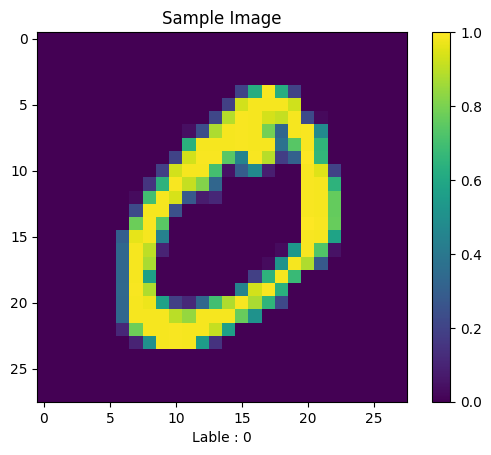

In [14]:
plt.figure()
plt.imshow(x_train[1])
plt.title('Sample Image')
plt.colorbar()
plt.grid(False)
plt.xlabel('Lable : {}'.format(y_train[1]))
plt.show()

###  Tensorflow Keras
#### 위 Data를 기준으로 분류 모델을 만들도록 하겠습니다
* Tensorflow keras API를 통해 모델에 대한 정의

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer과 Cross Entropy Loss 선언

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* 5 Epoch로 학습할 Data로 학습 수행

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2183 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0976 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0522 - accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0439 - accuracy: 0.9860


* 모델을 평가할 Test 데이타에 대한 정의

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.9798


[0.06807452440261841, 0.9797999858856201]